# Feature Subset Selection Examples

In [6]:
import sys

sys.path.append("./my-staff")
from database import load_ds, dump_ds
from utils import show_data

In [7]:
X, y, features_names, class_names = load_ds("all")
X.shape

(293, 25)

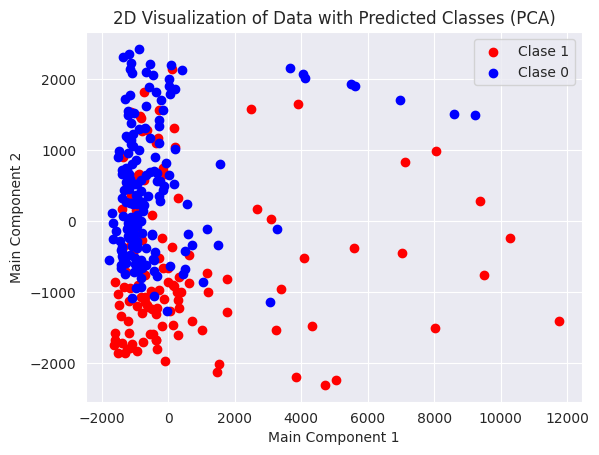

In [8]:
show_data(X, y)

In [9]:
print("Number of feutures", X.shape)

Number of feutures (293, 25)


##  Univariate filter feature subset selection

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif  # f_classif == ANOVA

In [11]:
def univariate_ds(X, y, k_features):
    selector = SelectKBest(score_func=mutual_info_classif, k=k_features)  # You can choose a different scoring function

    selector.fit_transform(X, y)

    selected_feature_indices = selector.get_support(indices=True)
    print(selected_feature_indices)
    selected_features = X.columns[selected_feature_indices]
    X_selected_univariant = X[selected_features]
    print(X_selected_univariant.shape)
    features_names_uni = list(X_selected_univariant.columns)
    feautures_str = ", ".join(sorted(features_names_uni)).replace("_", "-")

    dump_ds("univariant" + "_" + str(k_features), X_selected_univariant, y, features_names_uni, class_names)

    return X_selected_univariant, feautures_str


In [12]:
X_selected_univariant, feautures_str = univariate_ds(X, y, 15)

[ 0  1  2  4  5  6 10 11 12 14 16 18 21 23 24]
(293, 15)
Saved in  /home/alvaro/Desktop/MachineLearning/PracticalApplications/data/univariant_15.pkl


In [13]:
feautures_str

'Age, Albumin, Alk-Phos, Ascites-N, Bilirubin, Copper, Drug-D-penicillamine, Edema-N, Edema-Y, Hepatomegaly-N, Hepatomegaly-Y, N-Days, Prothrombin, Spiders-N, Stage'

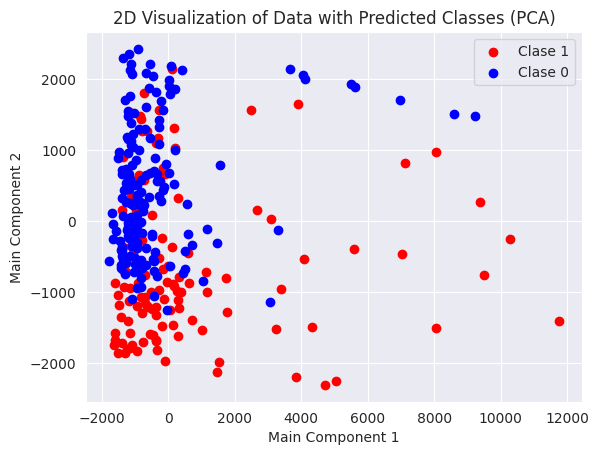

In [26]:
show_data(X_selected_univariant, y)

# Multivariant Filter subset selection

In [15]:
from skrebate import ReliefF

In [16]:
def multivariant_ds(X, y, k_features):
    # Create a ReliefF feature selector
    relieff_selector = ReliefF(n_features_to_select=k_features, n_neighbors=100)

    relieff_selector.fit_transform(X.values, y)

    selected_feature_indices = relieff_selector.top_features_[:k_features]
    selected_features = X.columns[selected_feature_indices]
    X_selected_multivariant = X[selected_features]

    print(X_selected_multivariant.shape)

    features_names_multi = list(X_selected_multivariant.columns)
    feautures_str = ", ".join(sorted(features_names_multi)).replace("_", "-")

    dump_ds("multivariant" + "_" + str(k_features), X_selected_multivariant, y, features_names_multi, class_names)

    return X_selected_multivariant, feautures_str


In [17]:
X_selected_multivariant, feautures_str = multivariant_ds(X, y, 15)
feautures_str

(293, 15)
Saved in  /home/alvaro/Desktop/MachineLearning/PracticalApplications/data/multivariant_15.pkl


'Albumin, Alk-Phos, Bilirubin, Copper, Edema-N, Hepatomegaly-N, Hepatomegaly-Y, N-Days, Prothrombin, SGOT, Sex-F, Sex-M, Spiders-N, Spiders-Y, Stage'

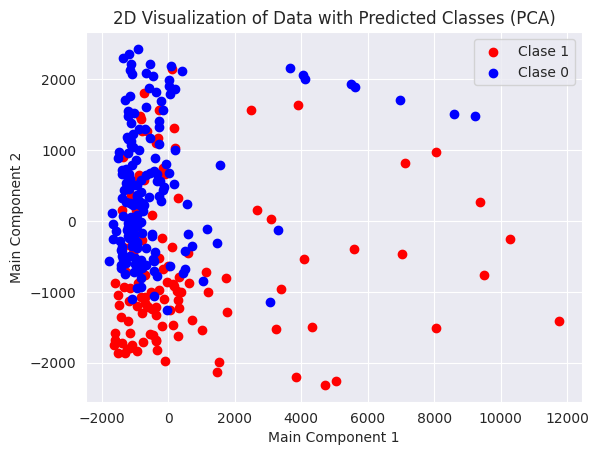

In [18]:
show_data(X_selected_multivariant, y)


# Wrapper

Each model should have one for it, be careful with the data used to select the feautures

In [29]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier


In [24]:
from sklearn.model_selection import train_test_split
from globals import TEST_SIZE, SEED

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=SEED)

print(len(X_train), len(X_test))

205 88


In [25]:
# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(estimator=RandomForestClassifier(), n_features_to_select=20,
                                direction="forward")

# Fit the SFS to the training data
sfs.fit(X_train, y_train)

# Get the selected features
sfs_features = sfs.get_support()

In [26]:
wrapper_features = X.columns[sfs_features]

In [32]:
features_names_wrapper = list(wrapper_features)
", ".join(sorted(wrapper_features)).replace("_", "-")

'Age, Albumin, Alk-Phos, Ascites-N, Ascites-Y, Bilirubin, Drug-D-penicillamine, Drug-Placebo, Edema-N, Edema-S, Edema-Y, N-Days, Sex-F, Sex-M, Tryglicerides'

In [28]:
X_selected_wrapper = X[features_names_wrapper]

In [29]:
X_selected_wrapper.shape

(293, 15)

In [30]:
dump_ds("wrapper", X_selected_wrapper, y, features_names_wrapper, class_names)

Saved in  /home/alvaro/Desktop/MachineLearning/PracticalApplications/data/wrapper.pkl


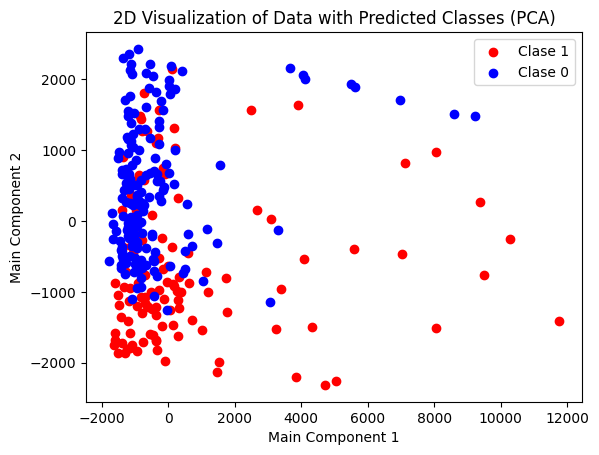

In [31]:
show_data(X_selected_wrapper, y)